# Imports

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.1 MB/s e

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)

In [3]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from pycaret.utils import version
from pycaret.datasets import get_data
from pycaret.clustering import *
from tabulate import tabulate

In [4]:
# pycaret version
version() 

'3.2.0'

# Reading the Data

In [5]:
available_datasets= get_data()

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [6]:
df= get_data('wholesale')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# Metrics Evaluation 

In [8]:
preprocessing= ['No Data Preprocessing', 'Using Normalization', 'Using Transform', 'Using PCA', 'Using T+N', 'T+N+PCA']
clusters= [3,4,5]

In [9]:
def evaluation_metrics(num, clustering_algo):
    model= create_model(clustering_algo, num_clusters= num, verbose= False)
            
    # Assign clusters to the data points
    clustered_data = assign_model(model)
            
    # Pull evaluation metrics
    evaluation_metrics = pull()
            
    # Extract evaluation metric values
    silhouette_score = evaluation_metrics['Silhouette'].values[0]
    calinski_score = evaluation_metrics['Calinski-Harabasz'].values[0]
    davies_score = evaluation_metrics['Davies-Bouldin'].values[0]
            
    return silhouette_score, calinski_score, davies_score

# KMeans Clustering

In [10]:
# Lists to store evaluation metric values
silhouette_scores= []         
calinski_scores= []
davies_scores= []

for i,name in enumerate(preprocessing):
    
    # No Data Preprocessing
    if i==0:
        s= setup(data= df)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'kmeans')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)
    
    # Using Normalization
    elif i==1:
        s= setup(data= df, normalize= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'kmeans')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)       

    # Using Transformation
    elif i==2:
        s= setup(data= df, transformation= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'kmeans')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score) 
            
    # Using PCA
    elif i==3:
        s= setup(data= df, pca= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'kmeans')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)             
            
    # Using Transformation + Normalization
    elif i==4:
        s= setup(data= df, normalize= True, transformation= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'kmeans')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score) 
            
    # Using Transformation + Normalization + PCA
    elif i==5:
        s= setup(data= df, normalize= True, transformation= True, pca= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'kmeans')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)             

,Description,Value
0,Session id,1401
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5920
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Description,Value
0,Session id,3963
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Description,Value
0,Session id,5940
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


,Description,Value
0,Session id,8264
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Description,Value
0,Session id,4402
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


In [11]:
items= []
for i in range(len(preprocessing)):
    for j,num in enumerate(clusters):
        name= f'c={num}'
        items.append((preprocessing[i],name))    # appending tuples to a list

In [12]:
for i in range(len(silhouette_scores)):
    silhouette_scores[i]= format(silhouette_scores[i],'.3f')
    calinski_scores[i]= format(calinski_scores[i],'.3f')
    davies_scores[i]= format(davies_scores[i],'.3f')

In [13]:
headings= pd.MultiIndex.from_tuples(items)
indexes= ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins']
kmeans_df= pd.DataFrame([silhouette_scores, calinski_scores, davies_scores], index= indexes, columns= headings)
# kmeans_df = kmeans_df.rename_axis('Parameters', axis='index')
kmeans_df= kmeans_df.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])   # to centre align the text
kmeans_df

In [14]:
s= setup(data= df, transformation= True)
kmeans_model= create_model('kmeans', num_clusters= 4)

,Description,Value
0,Session id,5828
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5181,15162.6315,0.6203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

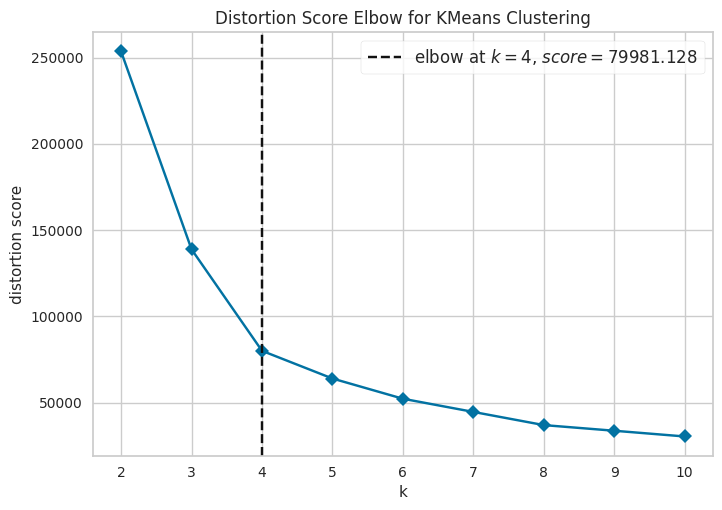

In [15]:
plot_model(kmeans_model, plot= 'elbow')

In [16]:
plot_model(kmeans_model, plot= 'tsne')

# Hierarchical Clustering

In [17]:
# Lists to store evaluation metric values
silhouette_scores= []         
calinski_scores= []
davies_scores= []

for i,name in enumerate(preprocessing):
    
    # No Data Preprocessing
    if i==0:
        s= setup(data= df)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'hclust')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)
    
    # Using Normalization
    elif i==1:
        s= setup(data= df, normalize= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'hclust')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)       

    # Using Transformation
    elif i==2:
        s= setup(data= df, transformation= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'hclust')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score) 
            
    # Using PCA
    elif i==3:
        s= setup(data= df, pca= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'hclust')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)             
            
    # Using Transformation + Normalization
    elif i==4:
        s= setup(data= df, normalize= True, transformation= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'hclust')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score) 
            
    # Using Transformation + Normalization + PCA
    elif i==5:
        s= setup(data= df, normalize= True, transformation= True, pca= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'hclust')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)             

,Description,Value
0,Session id,4856
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5069
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Description,Value
0,Session id,716
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Description,Value
0,Session id,1646
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


,Description,Value
0,Session id,7547
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Description,Value
0,Session id,5033
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


In [18]:
items= []
for i in range(len(preprocessing)):
    for j,num in enumerate(clusters):
        name= f'c={num}'
        items.append((preprocessing[i],name))    # appending tuples to a list

In [19]:
for i in range(len(silhouette_scores)):
    silhouette_scores[i]= format(silhouette_scores[i],'.3f')
    calinski_scores[i]= format(calinski_scores[i],'.3f')
    davies_scores[i]= format(davies_scores[i],'.3f')

In [20]:
headings= pd.MultiIndex.from_tuples(items)
indexes= ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins']
hclust_df= pd.DataFrame([silhouette_scores, calinski_scores, davies_scores], index= indexes, columns= headings)
# hclust_df = hclust_df.rename_axis('Parameters', axis='index')
hclust_df= hclust_df.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])   # to centre align the text
hclust_df

In [21]:
s= setup(data= df, transformation= True)
hclust_model= create_model('hclust', num_clusters= 4)

,Description,Value
0,Session id,6981
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5109,14291.9587,0.6054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

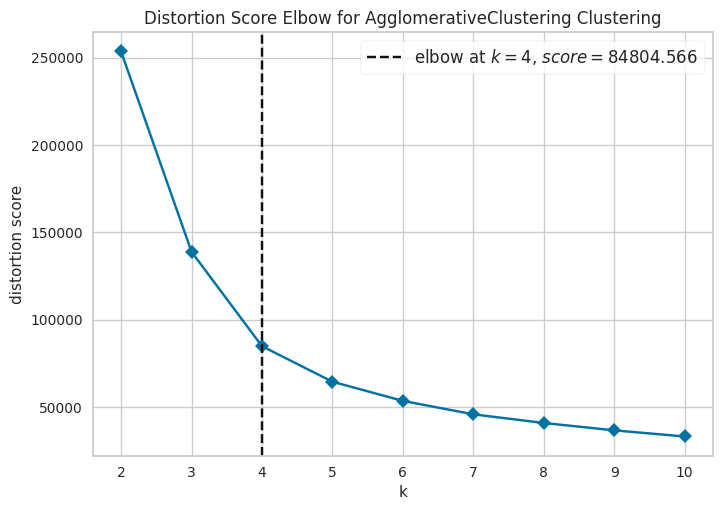

In [22]:
plot_model(hclust_model, plot= 'elbow')

In [23]:
plot_model(hclust_model, plot= 'tsne')

# DBSCAN Clustering

In [24]:
# Lists to store evaluation metric values
silhouette_scores= []         
calinski_scores= []
davies_scores= []

for i,name in enumerate(preprocessing):
    
    # No Data Preprocessing
    if i==0:
        s= setup(data= df)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'dbscan')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)
    
    # Using Normalization
    elif i==1:
        s= setup(data= df, normalize= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'dbscan')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)       

    # Using Transformation
    elif i==2:
        s= setup(data= df, transformation= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'dbscan')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score) 
            
    # Using PCA
    elif i==3:
        s= setup(data= df, pca= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'dbscan')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)             
            
    # Using Transformation + Normalization
    elif i==4:
        s= setup(data= df, normalize= True, transformation= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'dbscan')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score) 
            
    # Using Transformation + Normalization + PCA
    elif i==5:
        s= setup(data= df, normalize= True, transformation= True, pca= True)
        for num in clusters:
            silhouette_score, calinski_score, davies_score= evaluation_metrics(num,'dbscan')
            silhouette_scores.append(silhouette_score)
            calinski_scores.append(calinski_score)
            davies_scores.append(davies_score)             

,Description,Value
0,Session id,2068
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1207
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Description,Value
0,Session id,8308
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Description,Value
0,Session id,5618
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


,Description,Value
0,Session id,248
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Description,Value
0,Session id,2718
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


In [25]:
items= []
for i in range(len(preprocessing)):
    for j,num in enumerate(clusters):
        name= f'c={num}'
        items.append((preprocessing[i],name))    # appending tuples to a list

In [26]:
for i in range(len(silhouette_scores)):
    silhouette_scores[i]= format(silhouette_scores[i],'.3f')
    calinski_scores[i]= format(calinski_scores[i],'.3f')
    davies_scores[i]= format(davies_scores[i],'.3f')

In [27]:
headings= pd.MultiIndex.from_tuples(items)
indexes= ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins']
dbscan_df= pd.DataFrame([silhouette_scores, calinski_scores, davies_scores], index= indexes, columns= headings)
# dbscan_df = hclust_df.rename_axis('Parameters', axis='index')
dbscan_df= dbscan_df.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])   # to centre align the text
dbscan_df

In [28]:
s= setup(data= df, transformation= True)
dbscan_model= create_model('dbscan', num_clusters= 4)

,Description,Value
0,Session id,3658
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
plot_model(dbscan_model, plot= 'tsne')

#### It can be observed that DBSCAN clustering algorithm is not applicable on this dataset as Silhouette score is equal to 0.

# Evaluation Metrics Table

In [30]:
kmeans_df

In [31]:
hclust_df

In [32]:
dbscan_df

# Thank You !!